#### Problem Lab 0: Simple Regression Model

This example uses the only the first feature of the diabetes dataset, in order to illustrate a two-dimensional plot of this regression technique. The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the [diabetes dataset](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset), and the responses predicted by the linear approximation.

The coefficients, the [residual sum of squares](https://en.wikipedia.org/wiki/Residual_sum_of_squares) and the coefficient of determination are also calculated.

[Source](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

Modifed for this tutorial

<table>
  <tr><td>
    <img src="https://miro.medium.com/max/593/1*pfmeGgGM5sxmLBQ5IQfQew.png"
         alt="Matrix" width="600">
    </td>
  <tr><td></td></tr>
  <tr><td>Seems like a sweet consumption problem to have ...</td></tr>
  <tr><td>
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSfq0lfEMNHr8h65oFR_fFPR_PsukQL60FiKDU16VB7Li17q5Fd&usqp=CAU" 
         alt="Cup Cakes" width="600">
  </td></tr>
</table>

In [0]:
import mlflow.sklearn
import mlflow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import os
import shutil
import pprint
import tempfile
from random import random, randint
from sklearn import metrics

### Random Text for the Message Artifacts

In [0]:
RANDOM_TEXTS = ["Look, Stay home for us, so we can order some cup cakes!",
                "This shelter-in-placeinduces sweet appetites. Look at the graphs of cupcakes consumption in SF !",
                "Don't Despair for those in-place shelters, for help and hope are on the way!",
                "Guess what, I'll just hack on this MLflow thingy. Seems way cool!",
                "Trying and learning the new MLflow Tracking component ... Perché No!",
                "Bonjour! Nice to be virtual now!"]

### Utility functions

In [0]:
def get_temporary_directory_path(prefix, suffix):
  """
  Get a temporary directory and files for artifacts
  :param prefix: name of the file
  :param suffix: .csv, .txt, .png etc
  :return: object to tempfile.
  """

  temp = tempfile.NamedTemporaryFile(prefix=prefix, suffix=suffix)
  return temp

def gen_random_text():
    """
    Random text for messages
    :return: return string message text
    """
    return RANDOM_TEXTS[randint(0, 5)]
  
def gen_line_plot():
  # Plot outputs
  plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
  plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
  plt.xticks(())
  plt.yticks(())
  plt.show()
  

### Load Diabetes data

In [0]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
df_x = pd.DataFrame(diabetes_X)
df_x.describe()

,0,1,2,3,4,5,6,7,8,9
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


### Create train/test split

In [0]:
# Use only one feature, and reshape it as scikit-learn expects 2D array as input to the 
# fit method
diabetes_X = diabetes_X[:, np.newaxis, 2]
# Split the data into training/testing sets
diabetes_X_train, diabetes_X_test, diabetes_y_train,diabetes_y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=42)
df = pd.DataFrame(diabetes_X_train)
df.describe()

,0
count,353.000000
mean,0.001736
std,0.047275
min,-0.089197
25%,-0.032073
50%,-0.005128
75%,0.032595
max,0.160855


In [0]:
def mlflow_run(run_name="MLflow Workshop Part-1", params=None):
    """
    Function to start a run within a Default experiment
    :param params: parameters used for the run, such as arguments to RandomForestRegressor class scikit-learn
    :param run_name: label for the name of the run
    :return: experiment ID and run ID
    """

    with mlflow.start_run(run_name=run_name) as run:
        # Get the run and experimentid
        run_id = run.info.run_uuid
        experiment_id = run.info.experiment_id
        
        # Create linear regression object
        regr = linear_model.LinearRegression() if params is None else linear_model.LinearRegression(**params)

        # Train the model using the training sets
        regr.fit(diabetes_X_train, diabetes_y_train)

        # Make predictions using the testing set
        diabetes_y_pred = regr.predict(diabetes_X_test)
        
        mae = metrics.mean_absolute_error(diabetes_y_test, diabetes_y_pred)
        mse = metrics.mean_squared_error(diabetes_y_test, diabetes_y_pred)
        rsme = np.sqrt(mse)
        r2 = r2_score(diabetes_y_test, diabetes_y_pred)
        
        # The coefficient of determination: 1 is perfect prediction
        print(f'Coefficients: {regr.coef_}')
        print(f'Mean squared error: {mse}')
        print(f'Root mean square error: {rsme}')
        print(f'R2 score = {r2}')
     
       
        # Log metrics
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("mse", mse)
        mlflow.log_metric("rmse", rsme)
        mlflow.log_metric("r2_score", r2)
                      
        # Log the model
        mlflow.sklearn.log_model(
            sk_model=regr,
            artifact_path="sklearn-model")
        
        # Create sample message artifact
        if not os.path.exists("messages"):
            os.makedirs("messages")
        with open("messages/message.txt", "w") as f:
            f.write(gen_random_text())

        mlflow.log_artifact("messages")
        shutil.rmtree("messages")
        
        """
        # Create plot artifacts
        fig = gen_line_plot()
        temp_file_name = get_temporary_directory_path("scatter-plot-", ".png")
        temp_name = temp_file_name.name
        try:
          fig.savefig(temp_name)
          mlflow.log_artifact(temp_name, "scatter_plots")
        finally:
          temp_file_name.close()  # Delete the temp file
        """
        return (run_id, experiment_id)

In [0]:
(exp_id, run_id) = mlflow_run()
print(f"run_id={run_id}") 
print(f"experiment_id={exp_id}")

Coefficients: [998.57768914]
Mean squared error: 4061.8259284949268
Root mean square error: 63.73245584860925
R2 score = 0.23335039815872138
run_id=3489319451783840
experiment_id=7aeef4ca361646aeb65b396ee9eb6da4

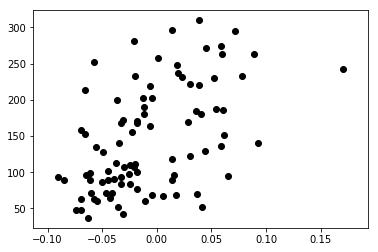

In [0]:
gen_line_plot()